In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_and_convert_data(file_path):
    """Load data from a pickle file and convert it from radians to degrees."""
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return np.degrees(data)

def plot_wheel_data(ax, time_data, wheel_data, wheel_number):
    """Plot wheel data on a given subplot."""
    ax.plot(time_data, wheel_data, linestyle='-', color='red')
    ax.set_title(f'Wheel {wheel_number}')
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Speed (deg/sec)')
    ax.grid(True)

In [9]:
# File paths
initial_file_path = './[실험값]wheel_velocity/u1_data_09M_12D_t33_new.pickle'
additional_file_paths = [
    './[실험값]wheel_velocity/u2_data_09M_12D_t33_new.pickle',
    './[실험값]wheel_velocity/u3_data_09M_12D_t33_new.pickle',
    './[실험값]wheel_velocity/u4_data_09M_12D_t33_new.pickle'
]

# Load and convert data
initial_data_deg = load_and_convert_data(initial_file_path)
additional_data_deg = [load_and_convert_data(path) for path in additional_file_paths]

# Generate time data (200Hz sampling rate)
sampling_rate = 200
time_interval = 1 / sampling_rate
time_data = np.arange(0, len(initial_data_deg) * time_interval, time_interval)

# Cut data after 87 seconds
cut_off_time = 87
cut_off_index = int(cut_off_time / time_interval)
time_data_cut = time_data[:cut_off_index]
initial_data_deg_cut = initial_data_deg[:cut_off_index]
additional_data_deg_cut = [data[:cut_off_index] for data in additional_data_deg]

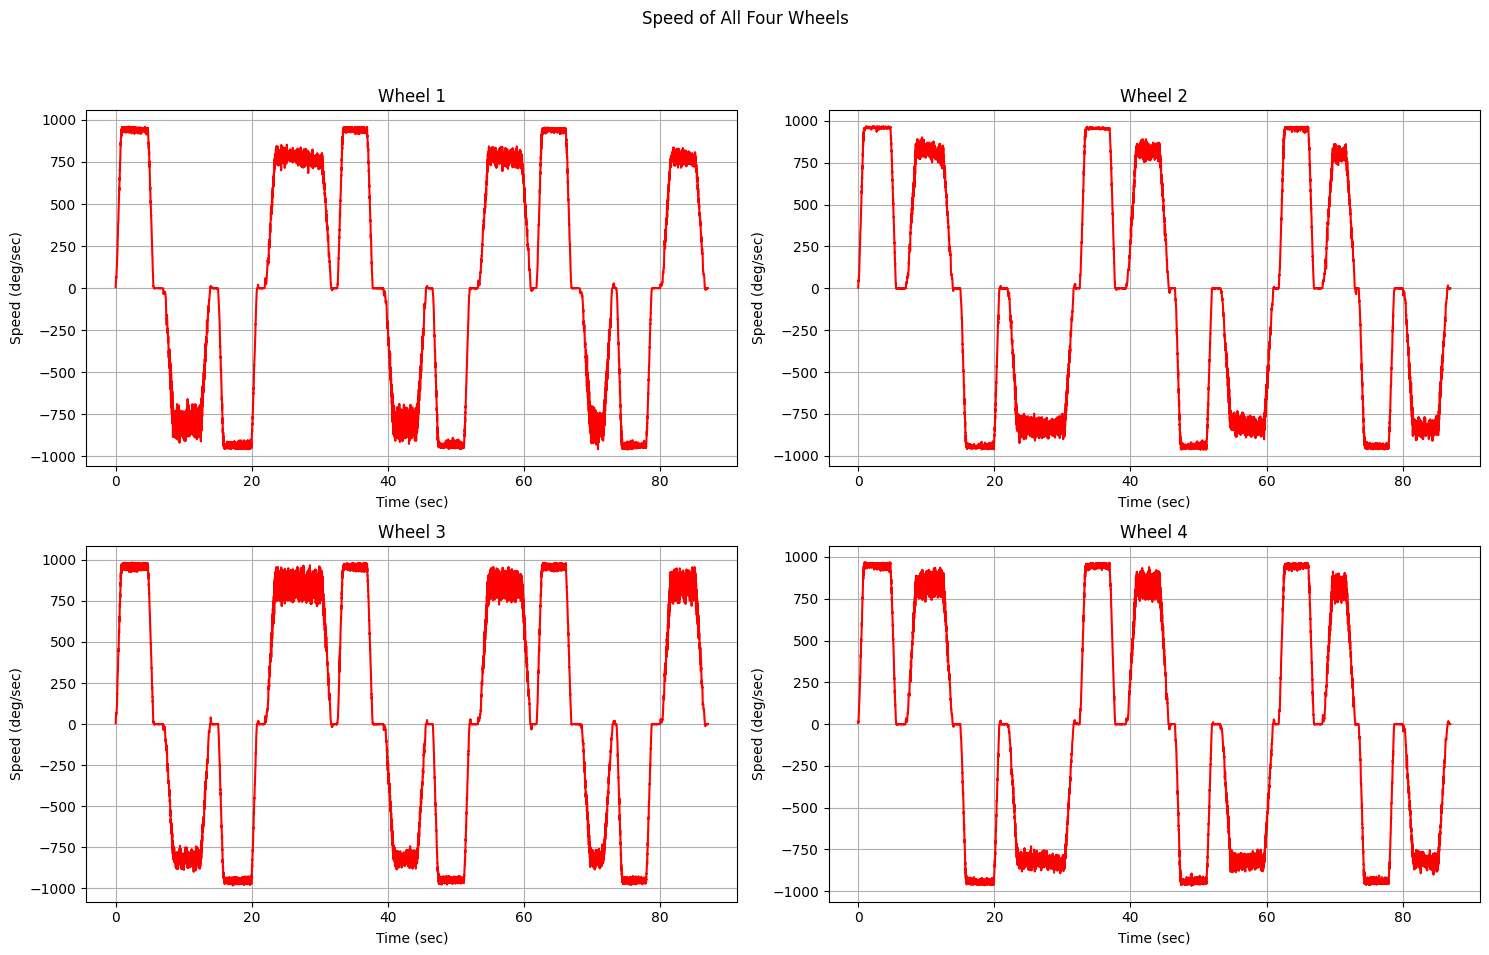

In [11]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
ax1, ax2, ax3, ax4 = axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]

# Plot data on subplots
plot_wheel_data(ax1, time_data_cut, initial_data_deg_cut, 1)
plot_wheel_data(ax2, time_data_cut, additional_data_deg_cut[0], 2)
plot_wheel_data(ax3, time_data_cut, additional_data_deg_cut[1], 3)
plot_wheel_data(ax4, time_data_cut, additional_data_deg_cut[2], 4)

# Add title for the entire figure
fig.suptitle('Speed of All Four Wheels')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

save_path = './[결과]Plot_image/wheel_velocity.png'

plt.savefig(save_path)
plt.show()